# Lesson 1: Mastering K-means Clustering with Python: From Theory to Practical Implementation


Welcome to our exploration of Unsupervised Learning and Clustering. In this lesson, we'll delve into K-means clustering, clarify its underlying principles, and navigate through the implementation of the K-means clustering algorithm in Python.

## Understanding Unsupervised Learning
Unsupervised Learning uses a dataset without labels to identify inherent patterns. Unlike Supervised Learning, which leverages known outcomes from data for label prediction, Unsupervised Learning operates independently. One application is market basket analysis, which predicts customer purchases based on associated buying behaviors.

## K-means Clustering: Theory and Implementation Overview
Let's encapsulate the essence of K-means clustering: this iterative algorithm partitions a group of data points into a predefined number of clusters based on their inherent distances from each other. The K in K-means denotes the number of clusters. K-means clustering operates based on a set metric, the most common of which is the Euclidean distance.

In subsequent sections, we'll adopt a hands-on approach to implement K-means clustering in Python. We'll be using libraries like numpy for numerical operations and matplotlib for visualizations. Let's get started!

## Initializing and Preparing for K-means Clustering
First, we initiate the lesson by loading the necessary libraries and defining our data points:

```python
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x1 = np.random.normal(loc=5, scale=1, size=(100, 2))
x2 = np.random.normal(loc=10, scale=2, size=(100, 2))
x = np.concatenate([x1, x2])

plt.scatter(x[:,0], x[:,1], label='True Position')
plt.show()
```

Next, we ready our dataset for K-means clustering. Here, we plot the data points, indicate the number of clusters, and initialize the centroids. Additionally, we introduce helper functions for computing Euclidean distances and assigning centroids.

```python
k = 3
centroids = x[np.random.choice(range(x.shape[0]), size=k, replace=False), :]

def calc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

def find_closest_centroids(ic, X):
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in ic:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid
```

## New Centroids Calculation
An important part of the K-means algorithm involves updating centroid positions, which is done in our code by the `calc_centroids` function. Once we have assigned data points to the nearest centroid, we need to update the centroid's position to reflect the mean of all data points now in that cluster. The `calc_centroids` function serves this purpose:

```python
import pandas as pd

def calc_centroids(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids
```

This function appends our clusters to our numpy data array X to form a new DataFrame `new_df`. Iterating over each unique cluster, it calculates the mean of all points in the cluster and stores it in `new_centroids`.

## Performing and Visualizing K-means Clustering
We'll now see the K-means clustering logic at work. The first step would be to create a function, `kmeans_clustering`, that encapsulates the main logic of the K-means clustering. This function will take in data points and the count of clusters. It will return the centroid coordinates and the assigned centroids for each point after the iterations.

```python
def kmeans_clustering(x, k):
    # Initialize Centroids - picking random samples
    centroids = x[np.random.choice(range(x.shape[0]), size=k, replace=False), :]
    
    for i in range(10):
        # Assign every data point to the closest centroid
        get_centroids = find_closest_centroids(centroids, x)
        # Recalculate centroid coordinates based on cluster members
        centroids = calc_centroids(get_centroids, x)

    return centroids, get_centroids
```

Let's apply `kmeans_clustering` to our previously defined data x and glance into the results:

```python
k = 3
centroids, get_centroids = kmeans_clustering(x, k)
print("Centroids:", centroids)
```

The centroids array would hold the final centroid coordinates of our clusters.

Each data point is now assigned to a particular centroid (cluster). We can visualize this using our Matplotlib:

```python
plt.scatter(x[:,0], x[:,1], c=get_centroids)
plt.scatter(np.array(centroids)[:,0], np.array(centroids)[:,1], c='red')
plt.show()
```

Your plot will now show your data points categorized into clusters. Each color represents a data point belonging to a particular centroid, marked in red.

By organizing the main logic into a function, we have rendered our K-means algorithm reusable for different datasets and cluster configurations providing us a toolbox to work with for future data analysis tasks.

## K-means Clustering with sklearn
For applications that require quick prototyping or dealing with large multidimensional datasets, implementing K-means clustering algorithm from scratch may not be feasible. Thankfully, Python provides the Scikit-Learn library, also known as sklearn, which comes with many efficient tools for machine learning and statistical modeling, one of which is the KMeans.

Firstly, we import the necessary libraries and initialize our data:

```python
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Let's define our data
x = np.array([[2, 10],
              [2, 5],
              [8, 4],
              [5, 8],
              [7, 5],
              [6, 4],
              [1, 2],
              [4, 9]])
```

Let's instantiate a KMeans object and fit the model to our data. Here we set `n_clusters` as 3, the number of clusters we want. `init` is set to 'k-means++', this initializes the centroids to be (generally) distant from each other, leading to probably better results than random initialization.

```python
kmeans_model = KMeans(n_clusters=3, init='k-means++')
kmeans_model.fit(x)
```

After the model is fitted to the data, the labels of the clusters can be obtained by calling `kmeans_model.labels_`, and the cluster centers (or 'centroids') can be obtained by calling `kmeans_model.cluster_centers_`.

```python
centroid = kmeans_model.cluster_centers_
labels = kmeans_model.labels_
```

Now we shall plot the data points, with the colour of the points denoting the clusters they belong to, and the centroids marked in red.

```python
plt.scatter(x[:,0], x[:,1],c=labels)
plt.scatter(centroid[:,0],centroid[:,1],c='red')
plt.show()
```

This shows our data points now clustered into three distinct clusters. It's important to note that while the sklearn implementation automates many parts of K-means clustering, understanding the underlying processes and principles is crucial in better interpreting the results and troubleshooting, if necessary.

When we use K-means clustering in machine learning, we aim to partition our dataset into 'k' distinct clusters. The algorithm works by randomly initializing points as cluster centers and iteratively refining the cluster assignment and the center points. But there's a catch: the algorithm's success can depend hugely on how those initial centers are chosen. If you get lucky, you could have a good set of starting points, and hence, quicker and better convergence to an optimal solution. If not, the algorithm can converge to a less optimal solution. In machine learning, we're not fans of relying on such luck!

The `n_init` parameter tells the KMeans algorithm, "Hey, don't just start once; try multiple times with different random initializations and pick the best outcome." Essentially, `n_init` represents the number of times the algorithm will run with different centroid seeds.

To use `n_init`, you simply specify it when creating a KMeans instance:

```python
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
```

Setting `random_state` at the same time ensures that your 'luck' is reproducible, meaning you can get the same result every time you run the algorithm with that state. It's like your very own space-time anchor in the realm of randomness!

And that, my dear pioneering data astronaut, is how `n_init` equips you with the power to navigate the stochastic stars of K-means clustering.

## Conclusion and Practice Mentoring
Congratulations! You have understood unsupervised learning and grasped the essence of K-means clustering, inching closer to proficiency in its Python implementation. Keep practicing to solidify your understanding. Modify the clusters or experiment with varying datasets for a broader scope of exploration. Our upcoming lessons will reveal several more exciting aspects such as clustering visualizations using matplotlib and the evaluation of K-means performance. Looking forward to your continued journey!
```

This Markdown format organizes your content into clear sections, uses code blocks for Python code, and applies headers to define each part of the lesson, enhancing both readability and navigability.

## Spectral Clustering of Stars

Imagine you're tasked with grouping stars based on their spectral characteristics to better understand the galaxy. That's similar to what we're doing here with artificial data and K-means clustering. The given code sets up the entire clustering process and visualizes the results.

Run the code to see how the data points are organized into clusters and displayed!

```py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation
np.random.seed(0)
x1 = np.random.normal(loc=5, scale=1, size=(100, 2))
x2 = np.random.normal(loc=10, scale=2, size=(100, 2))
x = np.concatenate([x1, x2])

# K-means clustering preparation
k = 3
np.random.seed(42)
centroids = x[np.random.choice(range(x.shape[0]), size=k, replace=False), :]

def calc_distance(x1, x2):
    return (sum((x1 - x2)**2))**0.5

def find_closest_centroids(centroids, x):
    assigned_centroid = []
    for i in x:
        distance = []
        for j in centroids:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

def calc_centroids(clusters, x):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(x), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

# K-means clustering function
def kmeans_clustering(x, k):
    centroids = x[np.random.choice(range(x.shape[0]), size=k, replace=False), :]
    
    for i in range(10):
        get_centroids = find_closest_centroids(centroids, x)
        centroids = calc_centroids(get_centroids, x)

    return centroids, get_centroids

# Applying K-means clustering
centroids, get_centroids = kmeans_clustering(x, k)

# Visualization of the final clustering
plt.scatter(x[:,0], x[:,1], c=get_centroids)
plt.scatter(np.array(centroids)[:,0], np.array(centroids)[:,1], c='red', marker='X')
plt.show()


```

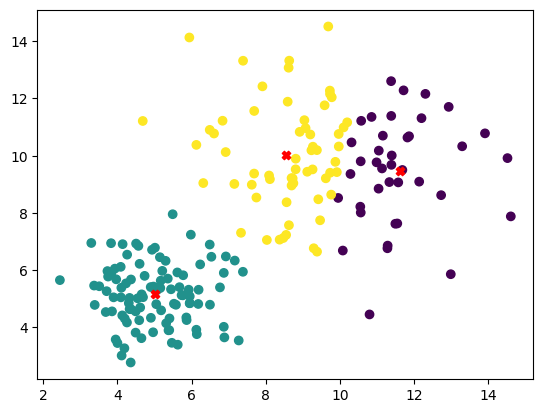

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation
np.random.seed(0)
x1 = np.random.normal(loc=5, scale=1, size=(100, 2))
x2 = np.random.normal(loc=10, scale=2, size=(100, 2))
x = np.concatenate([x1, x2])

# K-means clustering preparation
k = 3
np.random.seed(42)
centroids = x[np.random.choice(range(x.shape[0]), size=k, replace=False), :]

def calc_distance(x1, x2):
    return (sum((x1 - x2)**2))**0.5

def find_closest_centroids(centroids, x):
    assigned_centroid = []
    for i in x:
        distance = []
        for j in centroids:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

def calc_centroids(clusters, x):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(x), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

# K-means clustering function
def kmeans_clustering(x, k):
    centroids = x[np.random.choice(range(x.shape[0]), size=k, replace=False), :]
    
    for i in range(10):
        get_centroids = find_closest_centroids(centroids, x)
        centroids = calc_centroids(get_centroids, x)

    return centroids, get_centroids

# Applying K-means clustering
centroids, get_centroids = kmeans_clustering(x, k)

# Visualization of the final clustering
plt.scatter(x[:,0], x[:,1], c=get_centroids)
plt.scatter(np.array(centroids)[:,0], np.array(centroids)[:,1], c='red', marker='X')
plt.show()

## Mystery Glitch in the Iris Galaxy

Great work, Space Voyager!

Your mission is to plot the K-means clustering results on the Iris dataset with 3 clusters. Starter code is provided, but it seems there's a hiccup in the clustering logic. Run the code, and use your knowledge about K-means clustering and matplotlib to correct the bug. May the stars guide your path to a solution!

About Iris Dataset: The Iris dataset is a classic and widely used dataset in pattern recognition, consisting of 150 samples from three species of Iris flowers (Iris setosa, Iris virginica, and Iris versicolor), with four features measured for each sample: the length and the width of the sepals and petals.

```py

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load the Iris dataset
iris = load_iris()
iris_data = iris.data

# Set a random seed for reproducibility
np.random.seed(42)

# Implementing the K-means algorithm using scikit-learn with proper initialization
kmeans = KMeans(n_clusters=1, init='k-means++', n_init=1, random_state=42)
kmeans.fit(iris_data)

# Visualize the clusters
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)
plt.title('K-means Clustering on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

```

The provided code snippet has a significant bug in the K-means clustering parameters which is preventing it from working as intended for the Iris dataset. Specifically, the number of clusters (`n_clusters`) is set to 1, which does not align with the mission's requirement to plot the results with 3 clusters. Additionally, the number of initializations (`n_init`) is set to 1, which might lead to a non-optimal solution. Let's correct these issues and adjust the code to fulfill the mission requirements:

1. Change `n_clusters` to 3 to correspond to the three species in the Iris dataset.
2. Increase `n_init` to a higher number (e.g., 10) to ensure more stable results through multiple initializations.

Here's the corrected code:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load the Iris dataset
iris = load_iris()
iris_data = iris.data

# Set a random seed for reproducibility
np.random.seed(42)

# Implementing the K-means algorithm using scikit-learn with proper initialization
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
kmeans.fit(iris_data)

# Visualize the clusters
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)
plt.title('K-means Clustering on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()
```

### Explanation of Changes:
- **n_clusters=3**: This setting aligns with the three species of the Iris dataset, helping to visualize how well K-means can separate these species based on sepal length and width.
- **n_init=10**: This increases the number of random initializations, enhancing the likelihood of finding a more optimal clustering solution.

The visualization now plots the Iris dataset points colored by their cluster assignment, with the centroids of each cluster marked in red. This plot will help in understanding how the K-means algorithm groups the data points based on the features provided (sepal length and width in this case).

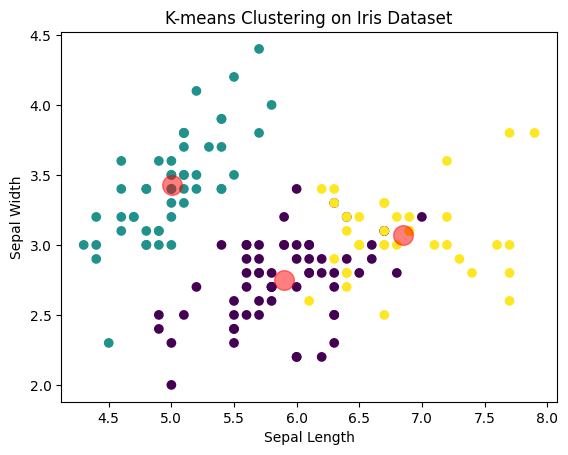

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load the Iris dataset
iris = load_iris()
iris_data = iris.data

# Set a random seed for reproducibility
np.random.seed(42)

# Implementing the K-means algorithm using scikit-learn with proper initialization
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
kmeans.fit(iris_data)

# Visualize the clusters
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)
plt.title('K-means Clustering on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


## Cluster Centroids Initialization

Great job so far, Space Voyager! Now, let's put your skills to the test. Can you figure out how to identify the central stars of our data galaxy? Initialize two centroids for our clusters. Jump right in!

```py
import numpy as np
import matplotlib.pyplot as plt

# Function to initialize centroids
def initialize_centroids(points, k):
    # TODO: Shuffle the points and select 'k' centroids
    return None

# Create a larger toy dataset
data = np.array([[5.1, 3.5], [4.5, 2.3], [6.2, 2.8], [5.8, 2.7],
                 [4.9, 3.0], [5.1, 3.8], [6.0, 3.0], [5.4, 3.4],
                 [4.7, 3.2], [4.6, 3.6], [5.2, 2.7], [5.5, 4.2],
                 [4.6, 3.1], [5.0, 3.4], [5.9, 3.2], [6.1, 3.3],
                 [5.0, 3.6], [4.8, 3.0], [6.7, 3.0], [6.3, 2.5]])

# TODO: Initialize centroids for 2 clusters

# Visualize the data points and initial centroids
plt.scatter(data[:, 0], data[:, 1], label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', label='Initial Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

```

To initialize the centroids for your clusters, you can shuffle the dataset and then select the first 'k' elements as your initial centroids. This approach is straightforward and often effective, especially when combined with multiple runs of the clustering algorithm to minimize the impact of random initialization.

Here's how you can complete the `initialize_centroids` function and integrate it into your existing code to visualize the initial centroids along with your dataset:

```python
import numpy as np
import matplotlib.pyplot as plt

# Function to initialize centroids
def initialize_centroids(points, k):
    np.random.shuffle(points)
    return points[:k]

# Create a larger toy dataset
data = np.array([[5.1, 3.5], [4.5, 2.3], [6.2, 2.8], [5.8, 2.7],
                 [4.9, 3.0], [5.1, 3.8], [6.0, 3.0], [5.4, 3.4],
                 [4.7, 3.2], [4.6, 3.6], [5.2, 2.7], [5.5, 4.2],
                 [4.6, 3.1], [5.0, 3.4], [5.9, 3.2], [6.1, 3.3],
                 [5.0, 3.6], [4.8, 3.0], [6.7, 3.0], [6.3, 2.5]])

# Initialize centroids for 2 clusters
centroids = initialize_centroids(data, 2)

# Visualize the data points and initial centroids
plt.scatter(data[:, 0], data[:, 1], label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, alpha=0.7, label='Initial Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
```

### Key Points:
1. **Shuffling the Data**: The `np.random.shuffle` function is used to shuffle the data in-place. This randomization helps in selecting a diverse set of initial centroids.
2. **Selecting Centroids**: After shuffling, the first 'k' samples from the dataset are chosen as centroids. This method is simple and often used as a part of the 'k-means++' initialization to avoid poor clustering due to unfortunate initial positions.
3. **Visualization**: The centroids are plotted along with the data points, marked distinctly in red and slightly larger for better visibility.

This approach provides a good starting point for the K-means clustering algorithm. While this manual method is effective for educational purposes and small datasets, in practice, especially with larger and more complex datasets, using advanced initialization methods like 'k-means++' (as provided by libraries like scikit-learn) can lead to more consistent and reliable clustering outcomes.

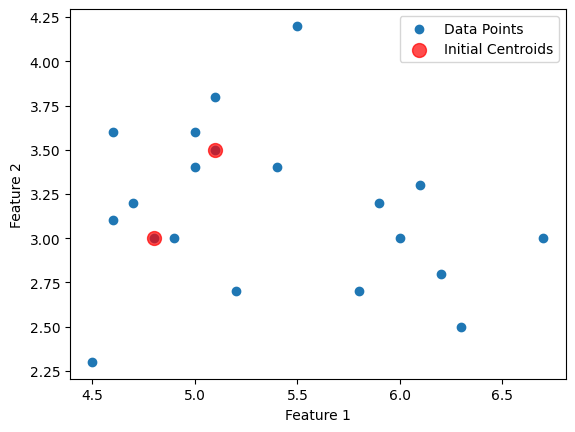

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to initialize centroids
def initialize_centroids(points, k):
    np.random.shuffle(points)
    return points[:k]

# Create a larger toy dataset
data = np.array([[5.1, 3.5], [4.5, 2.3], [6.2, 2.8], [5.8, 2.7],
                 [4.9, 3.0], [5.1, 3.8], [6.0, 3.0], [5.4, 3.4],
                 [4.7, 3.2], [4.6, 3.6], [5.2, 2.7], [5.5, 4.2],
                 [4.6, 3.1], [5.0, 3.4], [5.9, 3.2], [6.1, 3.3],
                 [5.0, 3.6], [4.8, 3.0], [6.7, 3.0], [6.3, 2.5]])

# Initialize centroids for 2 clusters
centroids = initialize_centroids(data, 2)

# Visualize the data points and initial centroids
plt.scatter(data[:, 0], data[:, 1], label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, alpha=0.7, label='Initial Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
